# Online Payments Fraud Detection
# **Description**

The increasing use of online credit/debit card transactions due to the growth in internet and e-commerce has led to a rise in fraud cases. Detecting these frauds is crucial but can be challenging due to various limitations in accuracy and drawbacks of existing approaches. To address this issue, a proposed method utilizes classification algorithms such as Decision Tree, Random Forest, SVM, Extra Tree Classifier, and XGBoost Classifier to train and test the data for fraud detection. The best-performing model is selected and saved in a pkl format, and the project involves integrating it with Flask.




In [ ]:
#using kaggle api to load the dataset
! pip install -q kaggle
!mkdir ~/.kaggle #creating a kaggle directory
!cp kaggle.json ~/.kaggle   #copying json file to folder
!kaggle datasets download -d rupakroy/online-payments-fraud-detection-dataset
!unzip /content/online-payments-fraud-detection-dataset.zip

mkdir: cannot create directory ‘/root/.kaggle’: File exists
 99% 176M/178M [00:02<00:00, 102MB/s]
100% 178M/178M [00:02<00:00, 88.3MB/s]
Archive:  /content/online-payments-fraud-detection-dataset.zip
  inflating: PS_20174392719_1491204439457_log.csv  


In [ ]:
#Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#for model building
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
import xgboost as xgb
#for comparing the models
from sklearn.metrics import classification_report, confusion_matrix
import pickle

In [ ]:
#Reading the csv file
df=pd.read_csv("/content/PS_20174392719_1491204439457_log.csv")
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [ ]:
df.drop(['isFlaggedFraud'],axis=1,inplace=True) #useless column

In [ ]:
df.shape

(6362620, 10)

In [ ]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 10 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
dtypes: float64(5), int64(2), object(3)
memory usage: 485.4+ MB


In [ ]:
df.isnull().sum()#no null values

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
dtype: int64

In [ ]:
#correlation
df.corr()

<ipython-input-9-a46c601d5826>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
step,1.000000,0.022373,-0.010058,-0.010299,0.027665,0.025888,0.031578
amount,0.022373,1.000000,-0.002762,-0.007861,0.294137,0.459304,0.076688
oldbalanceOrg,-0.010058,-0.002762,1.000000,0.998803,0.066243,0.042029,0.010154
newbalanceOrig,-0.010299,-0.007861,0.998803,1.000000,0.067812,0.041837,-0.008148
oldbalanceDest,0.027665,0.294137,0.066243,0.067812,1.000000,0.976569,-0.005885
newbalanceDest,0.025888,0.459304,0.042029,0.041837,0.976569,1.000000,0.000535
isFraud,0.031578,0.076688,0.010154,-0.008148,-0.005885,0.000535,1.000000


##DATA VISUALIZATION

###UNIVARIATE ANALYSIS

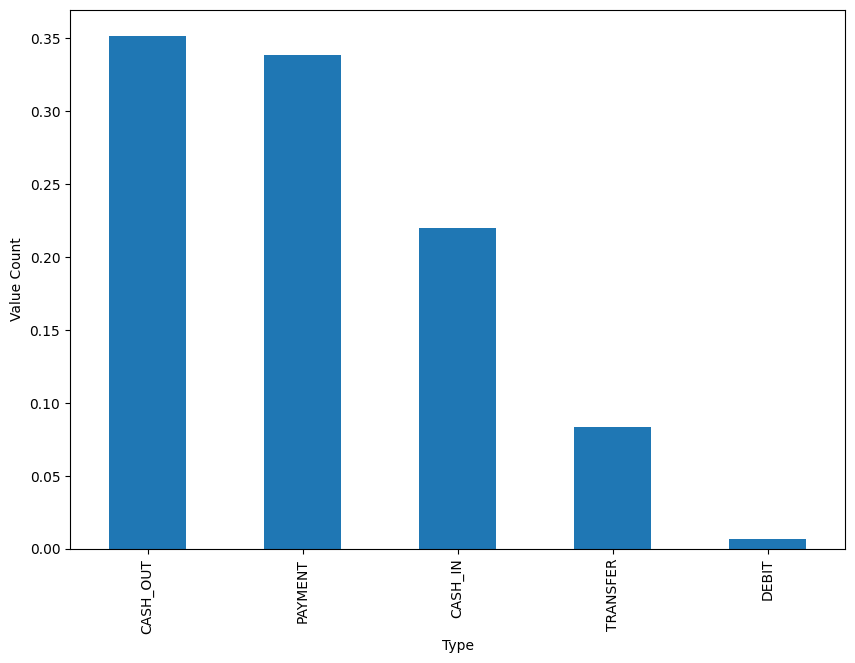

In [ ]:
#univariate Analysis

import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10, 7))
df['type'].value_counts(normalize=True).plot(kind='bar')
plt.xlabel("Type")
plt.ylabel("Value Count")
plt.show()


<Axes: >

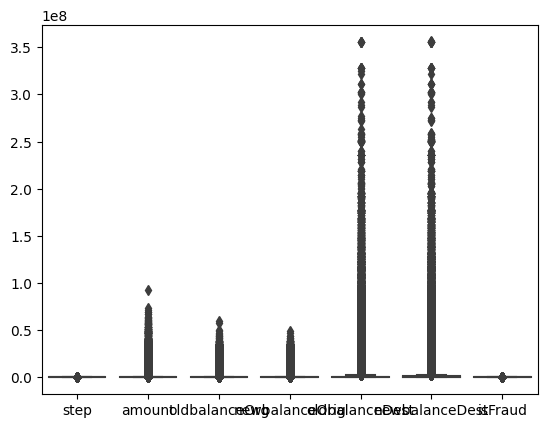

In [ ]:
sns.boxplot(df) #UNIVARIATE AS WE ARE CONSIDERING ONE PARAMETER AT A TIME

<Axes: xlabel='type', ylabel='count'>

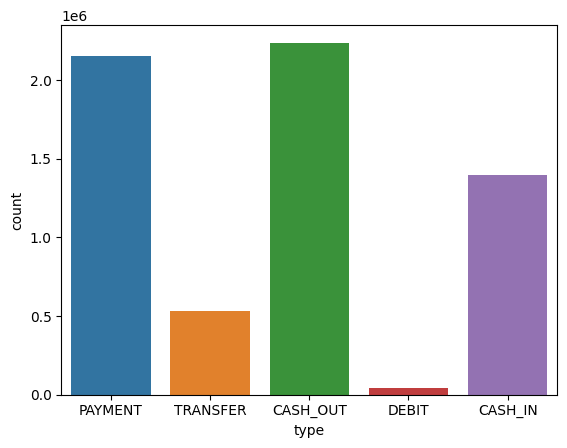

In [ ]:
#type
sns.countplot(data=df,x="type")

<ipython-input-13-dcb24808117d>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.amount)


<Axes: xlabel='amount', ylabel='Density'>

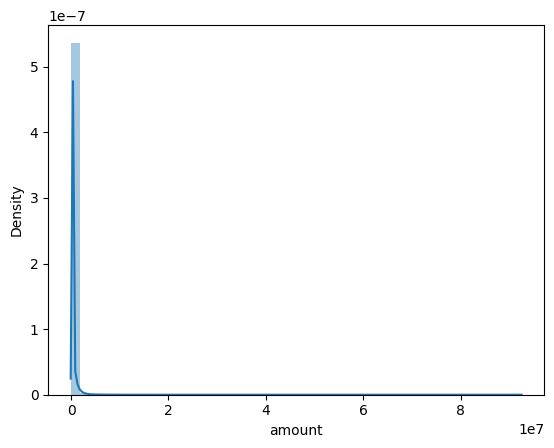

In [ ]:
sns.distplot(df.amount)

<Axes: xlabel='oldbalanceOrg', ylabel='Count'>

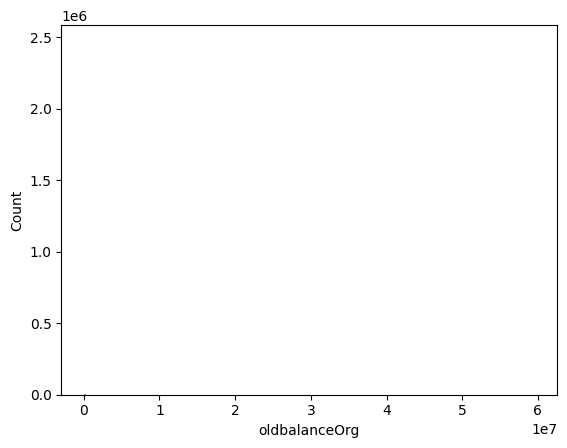

In [ ]:
#oldbalanceOrg
sns.histplot(data=df,x="oldbalanceOrg")

<Axes: xlabel='isFraud', ylabel='count'>

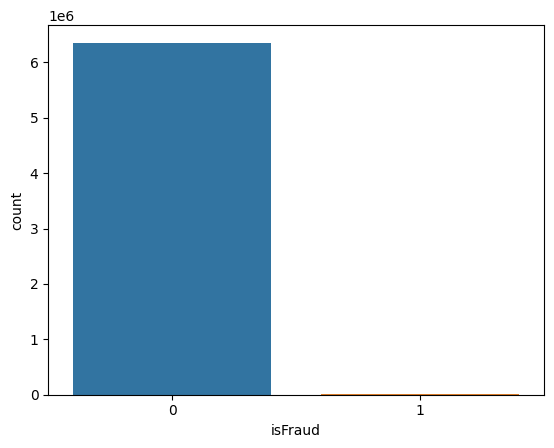

In [ ]:

sns.countplot(data=df,x="isFraud")

In [ ]:
df["isFraud"].value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64

In [ ]:
df.loc[df["isFraud"]==0,"isFraud"] = "is not Fraud"
df.loc[df["isFraud"]==1,"isFraud"] = "is Fraud"

In [ ]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,is not Fraud
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,is not Fraud
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,is Fraud
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,is Fraud
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,is not Fraud


###BIVARIATE ANALYSIS

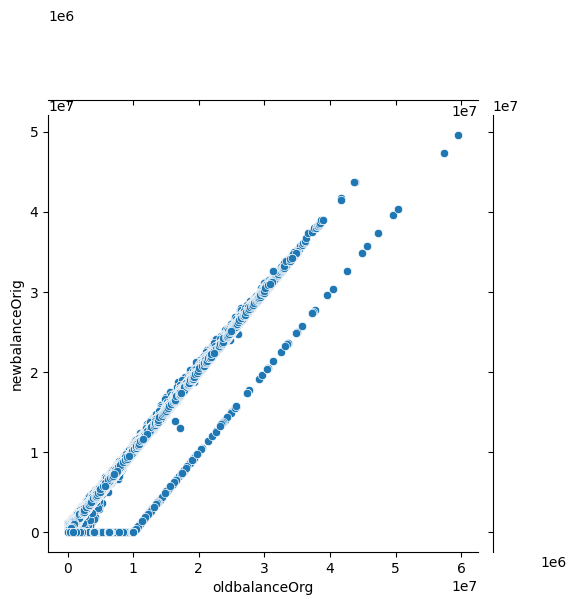

In [ ]:
sns.jointplot(x='oldbalanceOrg',y='newbalanceOrig',data=df)

<Axes: xlabel='isFraud', ylabel='newbalanceOrig'>

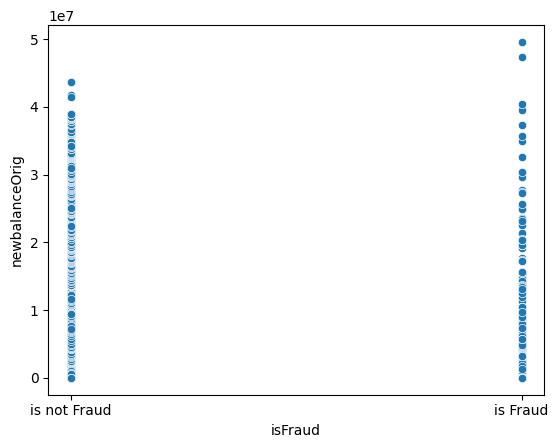

In [ ]:
sns.scatterplot(x=df.isFraud,y=df.newbalanceOrig)

<Axes: xlabel='amount', ylabel='oldbalanceOrg'>

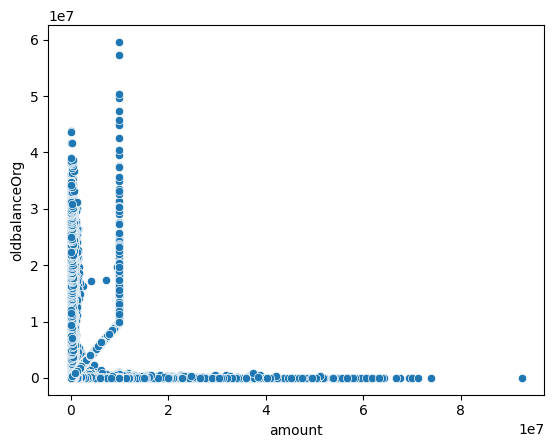

In [ ]:
sns.scatterplot(x=df.amount,y=df.oldbalanceOrg)

###MULTIVARIATE ANALYSIS

<ipython-input-22-8df7bcac526d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

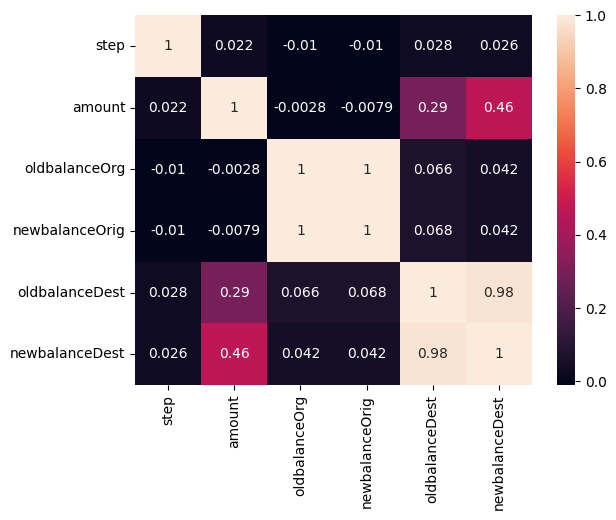

In [ ]:
sns.heatmap(df.corr(),annot=True)

# Data preprocessing

In [ ]:
df.shape

(6362620, 10)

In [ ]:
df.drop(['nameOrig','nameDest'], axis=1, inplace=True)#Removing unnecessary columns
df.columns

Index(['step', 'type', 'amount', 'oldbalanceOrg', 'newbalanceOrig',
       'oldbalanceDest', 'newbalanceDest', 'isFraud'],
      dtype='object')

In [ ]:
df.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,is not Fraud
1,1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,is not Fraud
2,1,TRANSFER,181.00,181.0,0.00,0.0,0.0,is Fraud
3,1,CASH_OUT,181.00,181.0,0.00,21182.0,0.0,is Fraud
4,1,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0,is not Fraud


##REMOVAL OF OUTLIERS

<Axes: >

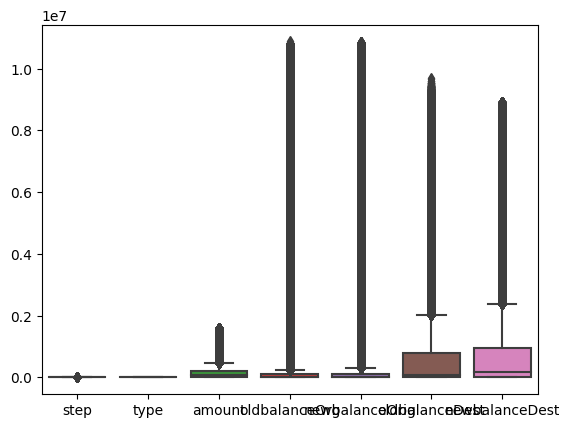

In [ ]:
sns.boxplot(df)

### REMOVAL OF OUTLIERS BY TRANSFORMATION METHOD

In [44]:
num=[var for var in df.columns if df[var].dtype!='O' and var!='isFraud']
num

['step',
 'amount',
 'oldbalanceOrg',
 'newbalanceOrig',
 'oldbalanceDest',
 'newbalanceDest']

In [50]:
from scipy import stats
for x in num:
  bmi_z_score=stats.zscore(df[x])
  df=df[np.abs(bmi_z_score)<=3]


<Axes: >

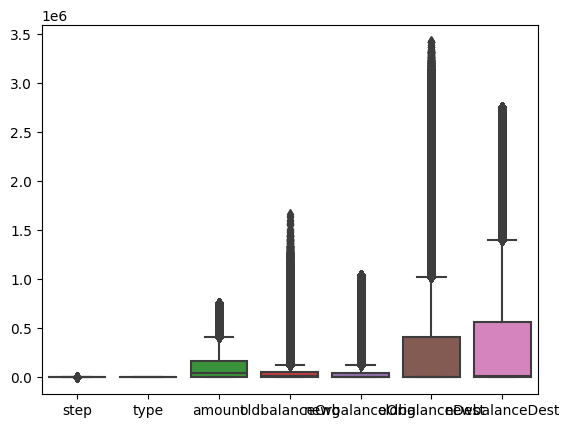

In [54]:
sns.boxplot(df)

##LABEL ENCODING

In [55]:
le=LabelEncoder()
df["type"]=le.fit_transform(df["type"])

In [56]:
df["type"].value_counts()

3    2119098
1    1858068
0     582235
4     272837
2      35104
Name: type, dtype: int64

In [57]:
# Dividing the dataset into dependent and independent y and x respectively
x=df.drop("isFraud",axis=1)
y=df["isFraud"]

In [58]:
x.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest
0,1,3,9839.64,170136.0,160296.36,0.0,0.0
1,1,3,1864.28,21249.0,19384.72,0.0,0.0
2,1,4,181.00,181.0,0.00,0.0,0.0
3,1,1,181.00,181.0,0.00,21182.0,0.0
4,1,3,11668.14,41554.0,29885.86,0.0,0.0


In [59]:
y.head()

0    is not Fraud
1    is not Fraud
2        is Fraud
3        is Fraud
4    is not Fraud
Name: isFraud, dtype: object

### Train test split

In [60]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0,test_size=0.2)

# Model Building

## 1.RandomForest clasifier

In [ ]:
rfc=RandomForestClassifier()
rfc.fit(x_train, y_train)

y_test_predict1=rfc.predict(x_test)
test_accuracy=accuracy_score(y_test,y_test_predict1)
test_accuracy

0.9997004661547614

In [ ]:
y_train_predict1=rfc.predict(x_train)
train_accuracy=accuracy_score(y_train,y_train_predict1)
train_accuracy

1.0

In [ ]:
pd.crosstab(y_test,y_test_predict1)

col_0,is Fraud,is not Fraud
isFraud,,
is Fraud,807,336
is not Fraud,23,1197363


In [ ]:
print(classification_report(y_test,y_test_predict1))

              precision    recall  f1-score   support

    is Fraud       0.97      0.71      0.82      1143
is not Fraud       1.00      1.00      1.00   1197386

    accuracy                           1.00   1198529
   macro avg       0.99      0.85      0.91   1198529
weighted avg       1.00      1.00      1.00   1198529



# 2.Decision Tree classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
dtc.fit(x_train, y_train)

y_test_predict2=dtc.predict(x_test)
test_accuracy=accuracy_score(y_test,y_test_predict2)
test_accuracy

0.9996912882374978

In [ ]:
y_train_predict2=dtc.predict(x_train)
train_accuracy=accuracy_score(y_train,y_train_predict2)
train_accuracy

1.0

In [ ]:
pd.crosstab(y_test,y_test_predict2)

col_0,is Fraud,is not Fraud
isFraud,,
is Fraud,1193,245
is not Fraud,204,1496519


In [ ]:
print(classification_report(y_test,y_test_predict2))

              precision    recall  f1-score   support

    is Fraud       0.85      0.83      0.84      1438
is not Fraud       1.00      1.00      1.00   1496723

    accuracy                           1.00   1498161
   macro avg       0.93      0.91      0.92   1498161
weighted avg       1.00      1.00      1.00   1498161



# 3.Support vector Machine classifier

In [ ]:
svc= SVC()
svc.fit(x_train,y_train)

y_test_predict4=svc.predict(x_test)
test_accuracy=accuracy_score(y_test,y_test_predict4)
test_accuracy

In [ ]:
y_train_predict4=svc.predict(x_train)
train_accuracy=accuracy_score(y_train,y_train_predict4)
train_accuracy

In [ ]:
pd.crosstab(y_test,y_test_predict4)

In [ ]:
print(classification_report(y_test,y_test_predict4))

In [ ]:
df.columns

Index(['step', 'type', 'amount', 'oldbalanceOrg', 'newbalanceOrig',
       'oldbalanceDest', 'newbalanceDest', 'isFraud'],
      dtype='object')

In [62]:
la= LabelEncoder()
y_train1 = la.fit_transform(y_train)

In [63]:
y_test1=la.transform(y_test)

In [64]:
y_test1=la.transform(y_test)

In [65]:
y_test1

array([1, 1, 1, ..., 1, 1, 1])

In [66]:
y_train1

array([1, 1, 1, ..., 1, 1, 1])

#4 Xgboost Classifier

In [67]:
import xgboost as xgb
xgb1 = xgb.XGBClassifier()
xgb1.fit(x_train,y_train1)
y_test_predict5=xgb1.predict(x_test)
test_accuracy=accuracy_score(y_test1,y_test_predict5)
test_accuracy

0.9997904401680998

In [68]:
y_train_predict5=xgb1.predict(x_train)
train_accuracy=accuracy_score(y_train1,y_train_predict5)
train_accuracy

0.9998602933377643

In [69]:
pd.crosstab(y_test1,y_test_predict5)

col_0,0,1
row_0,,
0,642,172
1,32,972623


In [70]:
print(classification_report(y_test1,y_test_predict5))

              precision    recall  f1-score   support

           0       0.95      0.79      0.86       814
           1       1.00      1.00      1.00    972655

    accuracy                           1.00    973469
   macro avg       0.98      0.89      0.93    973469
weighted avg       1.00      1.00      1.00    973469



# Saving the model

In [71]:
import pickle
pickle.dump(xgb1,open("model.pkl","wb"))